# Distinguish Your Own Digits (DYOD)

You are going to write a classifier that distinguishes between the number 3 and number 8.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

From the command line run `pip install mnist`. This is a library that will help you bring down the mnist dataset. If you run this from a notebook, you need to put  `!pip install mnist` in a cell by itself.

In [3]:
!pip install mnist

## Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


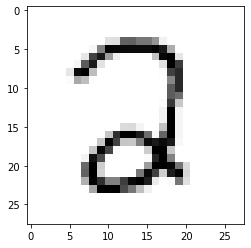

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

In [15]:
#Impoting functions from 'Kudzu'
from kudzu.model import Model
from kudzu.train import Learner
from kudzu.optim import GD
from kudzu.data import Data, Sampler,Dataloader

from kudzu.callbacks import AccCallback
from kudzu.callbacks import ClfCallback

from kudzu.loss import MSE

from kudzu.layer import Sigmoid,Relu
from kudzu.layer import Affine

### Let us create a `Config` class, to store important parameters. 
This class essentially plays the role of a dictionary.

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

### Running Models with the Training data
Details about the network layers:
- A first affine layer has 784 inputs and does 100 affine transforms. These are followed by a Relu
- A second affine layer has 100 inputs from the 100 activations of the past layer, and does 100 affine transforms. These are followed by a Relu
- A third affine layer has 100 activations and does 2 affine transformations to create an embedding for visualization. There is no non-linearity here.
- A final "logistic regression" which has an affine transform from 2 inputs to 1 output, which is squeezed through a sigmoid.


In [17]:
data = Data(X_train, y_train.reshape(-1,1))
sampler = Sampler(data, config.bs, shuffle=True)

dl = Dataloader(data, sampler)

opt = GD(config.lr)
loss = MSE()

In [18]:
training_data_x = X_train
testing_data_x = X_test
training_data_y = y_train.reshape(-1,1)
testing_data_y = y_test.reshape(-1,1)

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("last", 2, 1), Sigmoid("last")]
model_nn = Model(layers)
model_lr = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

xavier
xavier
xavier
xavier
xavier


In [20]:
nn_learner = Learner(loss, model_nn, opt, config.num_epochs)
acc_nn = ClfCallback(nn_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
nn_learner.set_callbacks([acc_nn])

In [21]:
lr_learner = Learner(loss, model_lr, opt, config.num_epochs)
acc_lr = ClfCallback(lr_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
lr_learner.set_callbacks([acc_lr])

In [22]:
nn_learner.train_loop(dl)

Epoch 0, Loss 0.2194
Training Accuracy: 0.8110, Testing Accuracy: 0.8246



Epoch 10, Loss 0.0671
Training Accuracy: 0.9321, Testing Accuracy: 0.9451



Epoch 20, Loss 0.0462
Training Accuracy: 0.9518, Testing Accuracy: 0.9567



Epoch 30, Loss 0.038
Training Accuracy: 0.9579, Testing Accuracy: 0.9662



Epoch 40, Loss 0.0335
Training Accuracy: 0.9619, Testing Accuracy: 0.9688



Epoch 50, Loss 0.0307
Training Accuracy: 0.9645, Testing Accuracy: 0.9718



Epoch 60, Loss 0.0286
Training Accuracy: 0.9672, Testing Accuracy: 0.9723



Epoch 70, Loss 0.027
Training Accuracy: 0.9689, Testing Accuracy: 0.9718



Epoch 80, Loss 0.0257
Training Accuracy: 0.9705, Testing Accuracy: 0.9723



Epoch 90, Loss 0.0246
Training Accuracy: 0.9715, Testing Accuracy: 0.9718



Epoch 100, Loss 0.0236
Training Accuracy: 0.9726, Testing Accuracy: 0.9723



Epoch 110, Loss 0.0228
Training Accuracy: 0.9735, Testing Accuracy: 0.9723



Epoch 120, Loss 0.0221
Training Accuracy: 0.9747, Testing Accuracy: 0.9728



Epoch 130, Loss 0.0214
Training Accuracy: 0.9755, Testing Accuracy: 0.9728



Epoch 140, Loss 0.0208
Training Accuracy: 0.9760, Testing Accuracy: 0.9733



Epoch 150, Loss 0.0202
Training Accuracy: 0.9765, Testing Accuracy: 0.9748



Epoch 160, Loss 0.0197
Training Accuracy: 0.9771, Testing Accuracy: 0.9768



Epoch 170, Loss 0.0192
Training Accuracy: 0.9775, Testing Accuracy: 0.9768



Epoch 180, Loss 0.0187
Training Accuracy: 0.9782, Testing Accuracy: 0.9758



Epoch 190, Loss 0.0182
Training Accuracy: 0.9794, Testing Accuracy: 0.9758



Epoch 200, Loss 0.0178
Training Accuracy: 0.9797, Testing Accuracy: 0.9753



Epoch 210, Loss 0.0174
Training Accuracy: 0.9803, Testing Accuracy: 0.9753



Epoch 220, Loss 0.017
Training Accuracy: 0.9806, Testing Accuracy: 0.9763



Epoch 230, Loss 0.0166
Training Accuracy: 0.9811, Testing Accuracy: 0.9758



Epoch 240, Loss 0.0162
Training Accuracy: 0.9813, Testing Accuracy: 0.9758



0.004391401513589862

In [23]:
lr_learner.train_loop(dl)

Epoch 0, Loss 0.2153
Training Accuracy: 0.7377, Testing Accuracy: 0.7364



Epoch 10, Loss 0.1021
Training Accuracy: 0.9075, Testing Accuracy: 0.9183



Epoch 20, Loss 0.0786
Training Accuracy: 0.9283, Testing Accuracy: 0.9390



Epoch 30, Loss 0.0678
Training Accuracy: 0.9365, Testing Accuracy: 0.9446



Epoch 40, Loss 0.0613
Training Accuracy: 0.9422, Testing Accuracy: 0.9501



Epoch 50, Loss 0.0568
Training Accuracy: 0.9456, Testing Accuracy: 0.9536



Epoch 60, Loss 0.0536
Training Accuracy: 0.9480, Testing Accuracy: 0.9556



Epoch 70, Loss 0.0511
Training Accuracy: 0.9495, Testing Accuracy: 0.9572



Epoch 80, Loss 0.049
Training Accuracy: 0.9505, Testing Accuracy: 0.9592



Epoch 90, Loss 0.0474
Training Accuracy: 0.9524, Testing Accuracy: 0.9602



Epoch 100, Loss 0.0459
Training Accuracy: 0.9533, Testing Accuracy: 0.9622



Epoch 110, Loss 0.0447
Training Accuracy: 0.9545, Testing Accuracy: 0.9627



Epoch 120, Loss 0.0437
Training Accuracy: 0.9554, Testing Accuracy: 0.9632



Epoch 130, Loss 0.0428
Training Accuracy: 0.9564, Testing Accuracy: 0.9642



Epoch 140, Loss 0.0419
Training Accuracy: 0.9568, Testing Accuracy: 0.9642



Epoch 150, Loss 0.0412
Training Accuracy: 0.9574, Testing Accuracy: 0.9642



Epoch 160, Loss 0.0405
Training Accuracy: 0.9576, Testing Accuracy: 0.9642



Epoch 170, Loss 0.0399
Training Accuracy: 0.9583, Testing Accuracy: 0.9647



Epoch 180, Loss 0.0394
Training Accuracy: 0.9585, Testing Accuracy: 0.9642



Epoch 190, Loss 0.0389
Training Accuracy: 0.9593, Testing Accuracy: 0.9647



Epoch 200, Loss 0.0384
Training Accuracy: 0.9595, Testing Accuracy: 0.9652



Epoch 210, Loss 0.038
Training Accuracy: 0.9598, Testing Accuracy: 0.9652



Epoch 220, Loss 0.0375
Training Accuracy: 0.9599, Testing Accuracy: 0.9652



Epoch 230, Loss 0.0372
Training Accuracy: 0.9604, Testing Accuracy: 0.9652



Epoch 240, Loss 0.0368
Training Accuracy: 0.9606, Testing Accuracy: 0.9657



0.033215701673335506

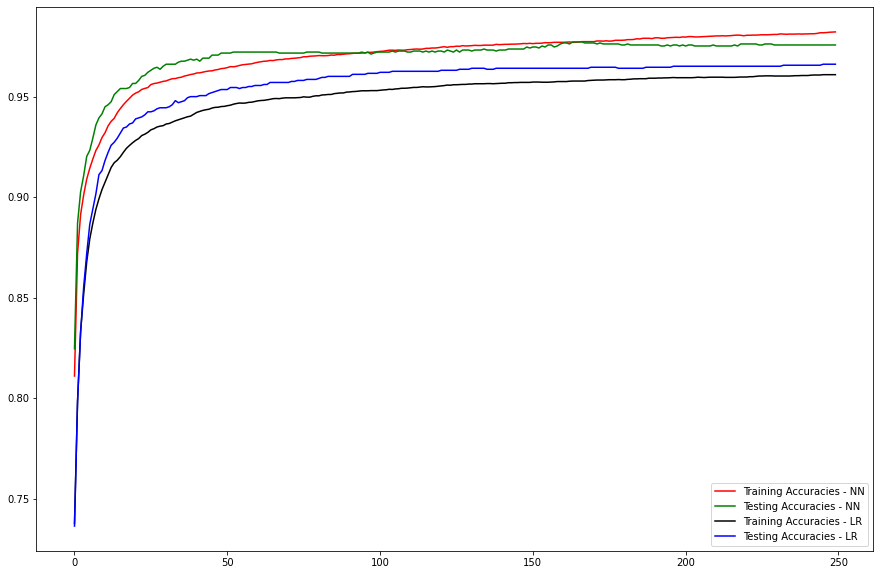

In [24]:
#comparing the results of NN and LR
plt.figure(figsize=(15,10))

# Neural Network plots
plt.plot(acc_nn.accuracies, 'r-', label = "Training Accuracies - NN")
plt.plot(acc_nn.test_accuracies, 'g-', label = "Testing Accuracies - NN")

# Logistic Regression plots
plt.plot(acc_lr.accuracies, 'k-', label = "Training Accuracies - LR")
plt.plot(acc_lr.test_accuracies, 'b-', label = "Testing Accuracies - LR")
plt.legend()

#### Plotting the outputs of this layer of the NN.


In [25]:
new_model = Model(layers[:-2])
testing_plot = new_model(testing_data_x)

Text(0.5, 1.0, 'Outputs')

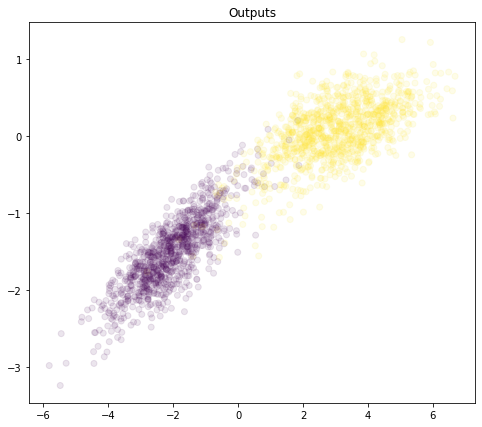

In [26]:
# Plotting the scatter plot of points and color coding by class
plt.figure(figsize=(8,7))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel());
plt.title('Outputs')

Probability contours

In [27]:
model_prob = Model(layers[-2:]) 

In [28]:
#creating the x and y ranges according to the above generated plot.
x_range = np.linspace(-4, 1, 100) 
y_range = np.linspace(-6, 6, 100) 
x_grid, y_grid = np.meshgrid(x_range, y_range) # x_grid and y_grig are of size 100 X 100

# converting x_grid and y_grid to continuous arrays
x_gridflat = np.ravel(x_grid)
y_gridflat = np.ravel(y_grid)

# The last layer of the current model takes two columns as input. Hence transpose of np.vstack() is required.
X = np.vstack((x_gridflat, y_gridflat)).T

prob_contour = model_prob(X).reshape(100,100) 

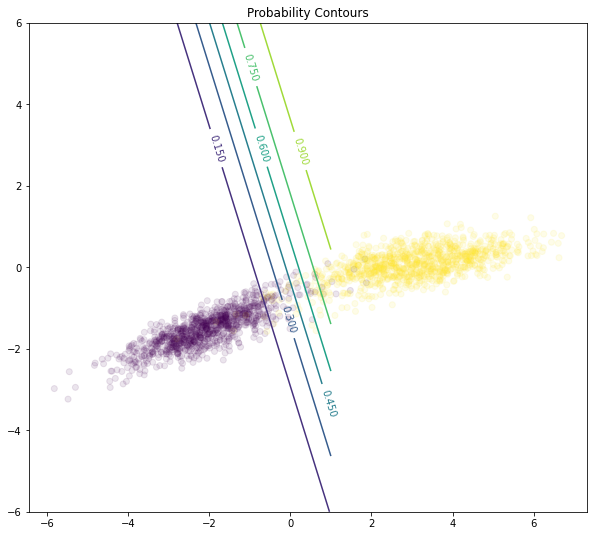

In [29]:
plt.figure(figsize=(10,9))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(x_grid,y_grid,prob_contour)
plt.title('Probability Contours')
plt.clabel(contours, inline = True );